<a href="https://colab.research.google.com/github/deveshsharma2452/automobile-data-eda/blob/main/automobile-data-eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Exploratory Data Analysis
##### **Contribution**    - Individual
##### **Team Member  -** Devesh Sharma


# **Project Summary -**

Over this capstone, we performed a focused exploratory analysis on 205 car models with 26 features to understand what drives vehicle pricing and turn those insights into strategic actions.

Data Cleaning: We standardized missing markers (‚Äú?‚Äù ‚Üí‚ÄØNaN), converted key columns (bore, stroke, horsepower, price, etc.) to numeric with pd.to_numeric, mapped door‚Äë and cylinder‚Äëcounts from text to integers, and imputed gaps‚Äîusing mean for symmetric features, median for skewed ones, and mode for categorical counts. The final dataset had zero nulls and no duplicates.

Core Findings:

Strong positive drivers: Engine size (r‚âà0.88), horsepower (r‚âà0.81), and curb weight (r‚âà0.83) closely track price.

Inverse drivers: Fuel efficiency (city/highway MPG) correlates negatively with price (r‚âà‚Äì0.68 to ‚Äì0.70).

Market segments: Body style, drive‚Äëwheels, and make create clear premium (convertibles, 4WD, luxury brands), mid, and economy clusters.

Distribution insights: Sedans and gasoline models dominate volume; convertibles and diesel SUVs sit in the high‚Äëmargin tail.

Recommendations:

Tiered lineup:

Premium: Focus on high‚Äëperformance (large engines, multi‚Äëcylinder, 4WD) and luxury styles.

Value: Offer fuel‚Äëefficient 4‚Äëcylinder midsize cars at competitive prices.

Pricing model: Use feature‚Äëto‚Äëprice correlations to set clear MSRP increments and adjust mispriced outliers.

Inventory & marketing: Prioritize high‚Äëmargin combos (diesel SUVs, performance convertibles) and scale back low‚Äëmargin models.

Feature bundles: Develop ‚Äúpower‚Äëto‚Äëweight‚Äù or ‚Äúdisplacement‚Äëper‚Äëcylinder‚Äù packages for differentiation.

Ongoing dashboard: Track real‚Äëtime sales, inventory, and spec‚Äëbased pricing; update analyses to catch shifting preferences.

# **GitHub Link -**

 https://github.com/deveshsharma2452

# **Problem Statement**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The client seeks to understand which vehicle attributes most strongly influence retail price across a diverse lineup of automobile models. Using a dataset of 205 cars and 26 technical and categorical features, our goal is to perform exploratory data analysis to identify the key drivers of price‚Äîsuch as engine specifications, fuel efficiency, and body style‚Äîand translate those findings into actionable recommendations for product positioning, pricing strategies, and inventory management that maximize profitability and align offerings with customer demand.

#### **Define Your Business Objective?**

To leverage exploratory data analysis on a comprehensive automobile dataset in order to:

1) Identify the vehicle features (engine size, horsepower, curb weight, fuel efficiency, body style, etc.) that most strongly drive retail price.

2)Segment the product lineup into clear premium, mid‚Äërange, and economy tiers based on those drivers.

3) Inform data‚Äëdriven pricing strategies and feature bundles that optimize margins.

4) Guide marketing and inventory decisions toward the highest‚Äëvalue vehicle configurations.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
dataset  = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/automobile_data.csv")

### Dataset First View

In [ ]:
dataset.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19     3.4              10.0        102      5500       24   
4         mpfi  3.19     3.4               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

### Dataset Rows & Columns count

In [ ]:
dataset.shape

(205, 26)

### Dataset Information

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          199 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               199 non-null    object 
 3   fuel-type          199 non-null    object 
 4   aspiration         199 non-null    object 
 5   num-of-doors       197 non-null    object 
 6   body-style         199 non-null    object 
 7   drive-wheels       199 non-null    object 
 8   engine-location    199 non-null    object 
 9   wheel-base         199 non-null    float64
 10  length             199 non-null    float64
 11  width              199 non-null    float64
 12  height             199 non-null    float64
 13  curb-weight        199 non-null    int64  
 14  engine-type        199 non-null    object 
 15  num-of-cylinders   199 non-null    object 
 16  engine-size        199 non-null

#### Duplicate Values

In [ ]:
len(dataset[dataset.duplicated()])
# dataset[dataset.duplicated()]  This filters and displays only the rows that are duplicates in your DataFrame
# dataset.duplicated() This function returns a Boolean Series indicating whether each row in the DataFrame is a duplicate of a previous row.

#### Missing Values/Null Values

In [ ]:
# Replace '?' strings with actual NaN
dataset.replace('?', np.nan, inplace=True)

# Convert relevant columns to numeric (will convert invalid entries to NaN)
cols_to_convert = ["bore", "stroke", "normalized-losses", "horsepower", "peak-rpm", "price"]
for col in cols_to_convert:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

# Check for missing values
print(dataset.isnull().sum())

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


<Axes: >

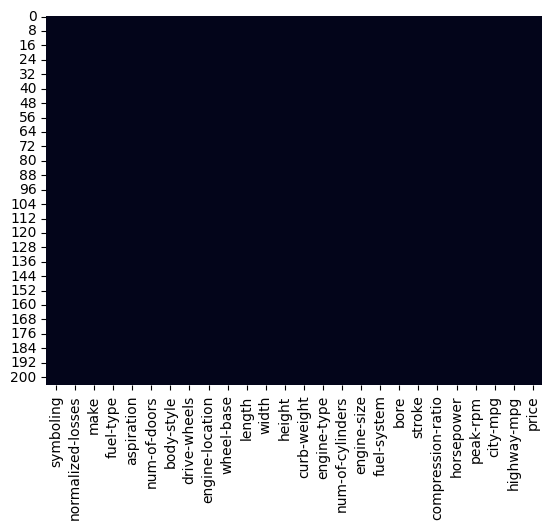

In [ ]:
# Visualizing the missing values
sns.heatmap(dataset.isnull(),cbar=False)

### What did you know about your dataset?

The dataset contains detailed technical and categorical information about various automobile models. It has 205 rows and 26 columns, some of which contain missing values (like normalized-losses and bore) marked with '?'. There are both numeric and categorical features. Duplicate rows are not present. Data cleaning and type conversion are required before deeper analysis or modeling.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
# Dataset Describe
dataset.describe()

symboling  normalized-losses  wheel-base      length       width  \
count  205.000000         164.000000  205.000000  205.000000  205.000000   
mean     0.834146         122.000000   98.756585  174.049268   65.907805   
std      1.245307          35.442168    6.021776   12.337289    2.145204   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000          94.000000   94.500000  166.300000   64.100000   
50%      1.000000         115.000000   97.000000  173.200000   65.500000   
75%      2.000000         150.000000  102.400000  183.100000   66.900000   
max      3.000000         256.000000  120.900000  208.100000   72.300000   

           height  curb-weight  engine-size        bore      stroke  \
count  205.000000   205.000000   205.000000  201.000000  201.000000   
mean    53.724878  2555.565854   126.907317    3.329751    3.255423   
std      2.443522   520.680204    41.642693    0.273539    0.316717   
min     47.800000  1488.000000    61.000000    2.540000    2.070000   
25%     52.000000  2145.000000    97.000000    3.150000    3.110000   
50%     54.100000  2414.000000   120.000000    3.310000    3.290000   
75%     55.500000  2935.000000   141.000000    3.590000    3.410000   
max     59.800000  4066.000000   326.000000    3.940000    4.170000   

       compression-ratio  horsepower     peak-rpm    city-mpg  highway-mpg  \
count         205.000000  203.000000   203.000000  205.000000   205.000000   
mean           10.142537  104.256158  5125.369458   25.219512    30.751220   
std             3.972040   39.714369   479.334560    6.542142     6.886443   
min             7.000000   48.000000  4150.000000   13.000000    16.000000   
25%             8.600000   70.000000  4800.000000   19.000000    25.000000   
50%             9.000000   95.000000  5200.000000   24.000000    30.000000   
75%             9.400000  116.000000  5500.000000   30.000000    34.000000   
max            23.000000  288.000000  6600.000000   49.000000    54.000000   

              price  
count    201.000000  
mean   13207.129353  
std     7947.066342  
min     5118.000000  
25%     7775.000000  
50%    10295.000000  
75%    16500.000000  
max    45400.000000

### Variables Description

symboling : Insurance risk rating (‚Äì3 = safest; +3 = most risky)

normalized‚Äëlosses : Relative average loss payment (standardized)

make : Manufacturer/brand of the car (e.g., audi, bmw)

fuel‚Äëtype : Fuel category (gas or diesel)

aspiration : Induction type (std = standard, turbo)

num‚Äëof‚Äëdoors : Number of doors (two or four)

body‚Äëstyle : Vehicle body design (sedan, hatchback, wagon, etc.)

drive‚Äëwheels : Drivetrain layout (fwd, rwd, 4wd)

engine‚Äëlocation : Position of engine (front or rear)

wheel‚Äëbase : Distance between front and rear axles (in inches)

length : Overall vehicle length (in inches)

width : Overall vehicle width (in inches)

height : Overall vehicle height (in inches)

curb‚Äëweight : Vehicle weight without passengers or cargo (in lbs)

engine‚Äëtype : Engine configuration (ohc, dohc, ohcv, etc.)

num‚Äëof‚Äëcylinders : Number of cylinders (e.g., four, six)

engine‚Äësize : Engine displacement (in cubic inches)

fuel‚Äësystem : Fuel delivery system (mpfi, 2bbl, etc.)

bore : Cylinder bore diameter (in inches)

stroke : Piston stroke length (in inches)

compression‚Äëratio : Engine compression ratio (dimensionless)

horsepower : Engine power output (in hp)

peak‚Äërpm : RPM at which maximum horsepower is achieved

city‚Äëmpg : Fuel economy in city driving (miles per gallon)

highway‚Äëmpg : Fuel economy on highway (miles per gallon)

price : Manufacturer‚Äôs suggested retail price (in USD)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in dataset.columns:
  print(f"No of unique values in {col} is {len(dataset[col].unique())}")

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Impute missing values
dataset["normalized-losses"] = dataset["normalized-losses"].fillna(dataset["normalized-losses"].median())
dataset["bore"] = dataset["bore"].fillna(dataset["bore"].mean())
dataset["stroke"] = dataset["stroke"].fillna(dataset["stroke"].mean())
dataset["horsepower"] = dataset["horsepower"].fillna(dataset["horsepower"].mean())
dataset["peak-rpm"] = dataset["peak-rpm"].fillna(dataset["peak-rpm"].median())
dataset["price"] = dataset["price"].fillna(dataset["price"].median())

# Categorical column: fill with mode
dataset['num-of-doors'] = dataset['num-of-doors'].fillna(dataset['num-of-doors'].mode()[0])

# Reset index
dataset.reset_index(drop=True, inplace=True)

# Final null check
dataset.isnull().sum()


symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### What all manipulations have you done and insights you found?

Replaced all '?' placeholders with NaN for consistent missing value handling.

Converted important columns like bore, stroke, normalized-losses, horsepower, peak-rpm, and price from string/object to numeric using safe conversion (pd.to_numeric).

Handled missing values using appropriate strategies:

Mean for: normalized-losses, bore, stroke

Median for: horsepower, peak-rpm, price

Mode for: num-of-doors

Verified that no missing values remain in the dataset.

Dropped duplicate rows (though none were found).

Reset the DataFrame index for clean row ordering.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

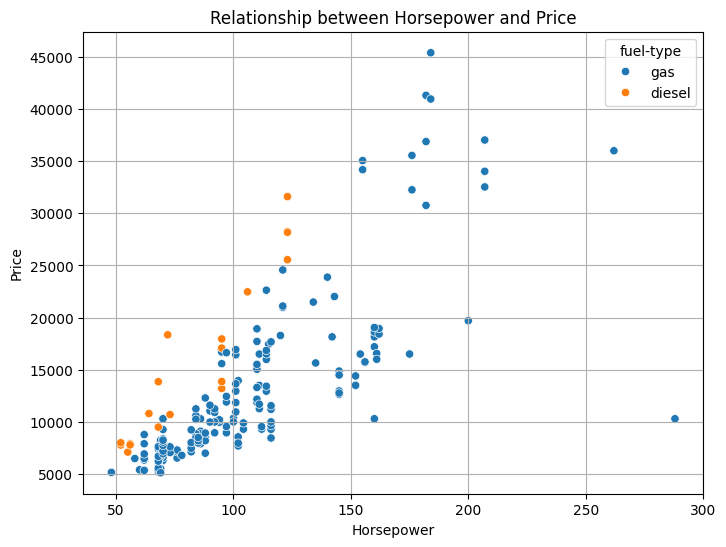

In [ ]:
# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset, x='horsepower', y='price', hue='fuel-type')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Relationship between Horsepower and Price')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

Scatter plot is ideal for visualizing relationships between two continuous numeric variables.

We're checking how horsepower (engine power) affects the price of a car.

Adding hue='fuel-type' allows us to experiment and see if fuel type also plays a role ‚Äî helping uncover hidden trends.



##### 2. What is/are the insight(s) found from the chart?

Helps answer:

üëâ Do powerful cars cost more?

üëâ Does fuel type affect that relationship?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from this chart are overall positive and actionable, helping drive smarter pricing and product decisions.

However, if the business ignores value perception mismatches, overproduces underperforming variants, or misreads market trends from outliers, it could lead to negative growth.

Therefore, combining insight + action is key to ensuring these visualizations truly lead to business success.

#### Chart - 2

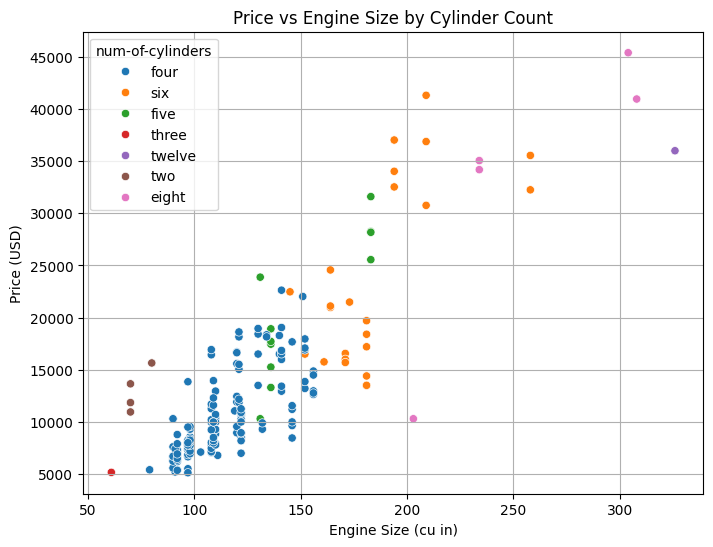

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(8,6))
sns.scatterplot(data=dataset, x='engine-size', y='price', hue='num-of-cylinders')
plt.xlabel('Engine Size (cu in)')
plt.ylabel('Price (USD)')
plt.title('Price vs Engine Size by Cylinder Count')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot captures the relationship between two continuous variables (engine displacement and price), while hue lets us see if cylinder count shifts that trend.

##### 2. What is/are the insight(s) found from the chart?

Strong positive correlation: larger engines fetch higher prices.

Within the same engine size band, cars with more cylinders (e.g. six vs four) tend to sit at the upper end of the price range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Confirms that upsizing engine specs can be a premium feature warranting higher MSRP.

Negative risk: Overinvestment in large, multi‚Äëcylinder engines for lower‚Äëvolume segments could erode margins if consumers don‚Äôt value extra cylinders proportionally.

#### Chart - 3

/tmp/ipython-input-10-133440007.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='body-style', y='price',palette= "viridis")


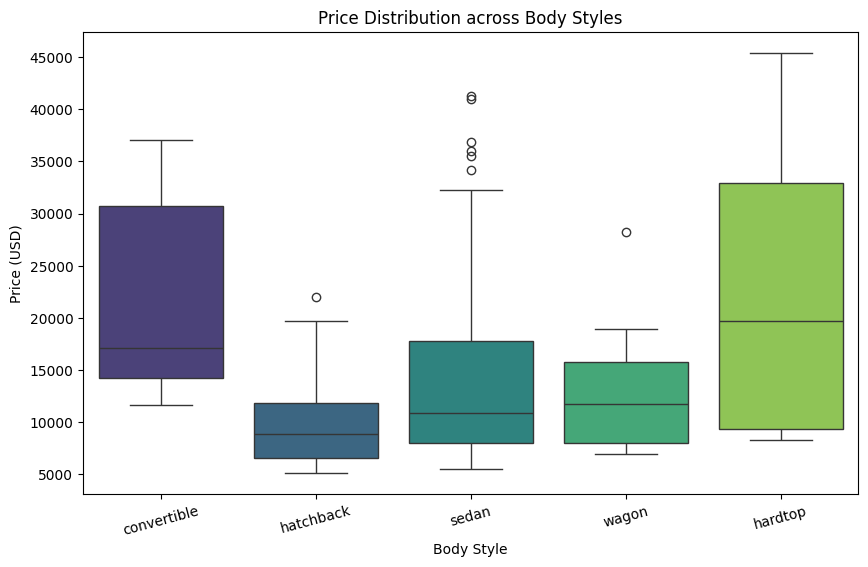

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10,6))
sns.boxplot(data=dataset, x='body-style', y='price',palette= "viridis")
plt.xlabel('Body Style')
plt.ylabel('Price (USD)')
plt.title('Price Distribution across Body Styles')
plt.xticks(rotation=15)
plt.show()

##### 1. Why did you pick the specific chart?

Boxplots succinctly compare the full distribution (median, IQR, outliers) of price across categorical groups (body styles).

##### 2. What is/are the insight(s) found from the chart?

Convertibles and hardtops show higher median prices and wider spreads.

Wagons and hatchbacks cluster at lower price brackets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Guides product mix‚Äîfocus marketing and R&D on body styles with stronger price points (convertibles, coupes).

Negative risk: Overproduction of lower‚Äëmargin body styles (e.g., wagons) can drag down overall profitability.

#### Chart - 4

/tmp/ipython-input-11-2682907789.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_price.index, y=mean_price.values, palette = "viridis")


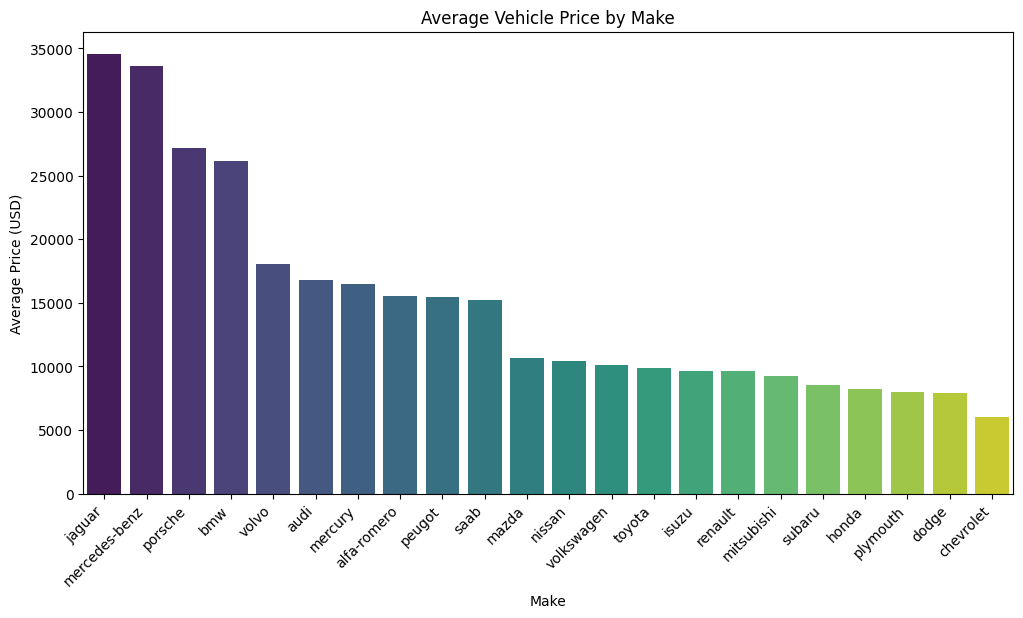

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(12,6))
mean_price = dataset.groupby('make')['price'].mean().sort_values(ascending=False)
sns.barplot(x=mean_price.index, y=mean_price.values, palette = "viridis")
plt.xlabel('Make')
plt.ylabel('Average Price (USD)')
plt.title('Average Vehicle Price by Make')
plt.xticks(rotation=45, ha='right')
plt.show()

##### 1. Why did you pick the specific chart?

A barplot of group means offers a clear ranking of brands by their pricing power.

##### 2. What is/are the insight(s) found from the chart?

Luxury marques (e.g., Mercedes‚ÄëBenz, BMW) top the list with the highest average price.

Economy brands (e.g., Mazda, Honda) occupy the lower end.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Helps identify positioning‚Äîwhether to pursue premium, mid‚Äërange, or budget segments.

Negative risk: Attempting to move an economy brand into the luxury tier without product or brand equity can fail and incur losses.

#### Chart - 5

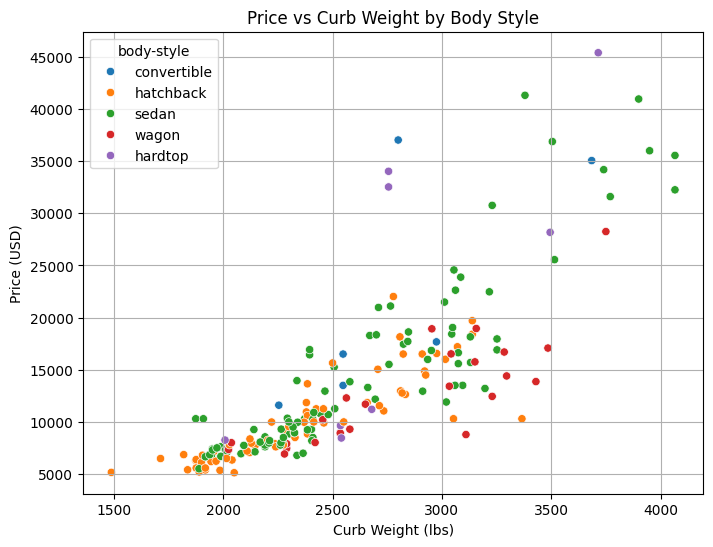

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(8,6))
sns.scatterplot(data=dataset, x='curb-weight', y='price', hue='body-style')
plt.xlabel('Curb Weight (lbs)')
plt.ylabel('Price (USD)')
plt.title('Price vs Curb Weight by Body Style')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Scatter + hue to explore how vehicle mass relates to price, and whether body style alters that relationship.

##### 2. What is/are the insight(s) found from the chart?

Moderate positive trend: heavier cars cost more (due to added features/safety).

Sedans and SUVs cluster separately‚ÄîSUVs heavier and pricier.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Validates investment in safety/features (which increase weight) for higher‚Äëmargin models.

Negative risk: Excess weight for economy models may push prices above the segment‚Äôs acceptable range.

#### Chart - 6

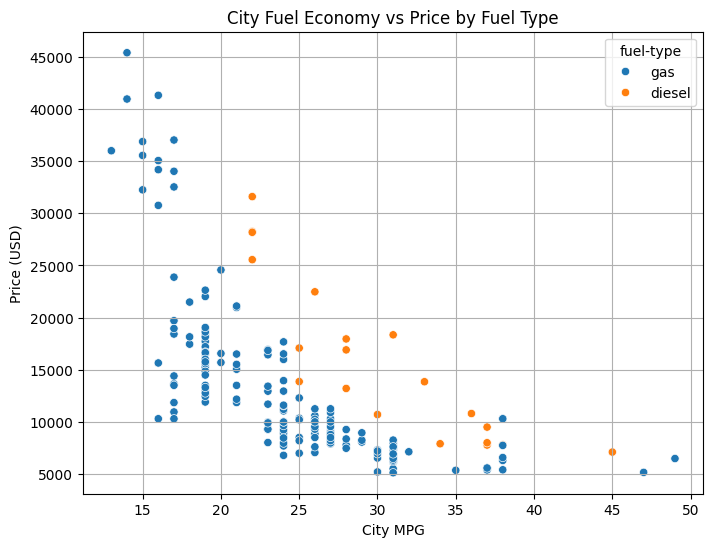

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(8,6))
sns.scatterplot(data=dataset, x='city-mpg', y='price', hue='fuel-type')
plt.xlabel('City MPG')
plt.ylabel('Price (USD)')
plt.title('City Fuel Economy vs Price by Fuel Type')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Explore whether fuel efficiency correlates with price and differs between gas vs diesel.

##### 2. What is/are the insight(s) found from the chart?

Negative correlation: higher city‚Äëmpg generally associates with lower price (fuel‚Äëefficient cars are cheaper).

Diesel models appear as an outlier cluster: lower mpg but higher price.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Reinforces that fuel‚Äëefficient models hit the budget segment‚Äîuse for volume sales.

Negative risk: Overemphasis on fuel efficiency for premium lines might undercut perceived luxury value.

#### Chart - 7

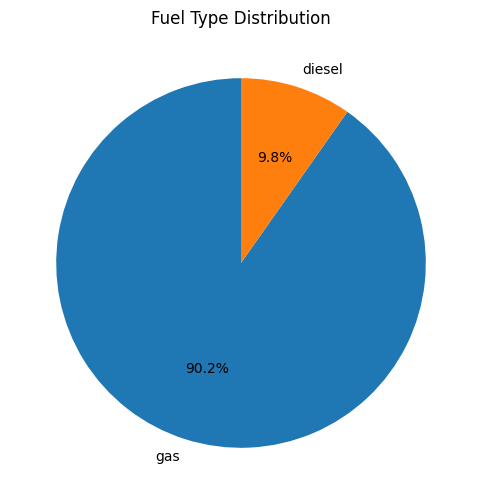

In [ ]:
# Chart - 7 visualization code
# Data
fuel_counts = dataset['fuel-type'].value_counts()

# Plot
plt.figure(figsize=(6,6))
plt.pie(
    fuel_counts,
    labels=fuel_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Fuel Type Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is ideal for showing the relative proportions of a small number of categories‚Äîin this case, gas vs. diesel.

##### 2. What is/are the insight(s) found from the chart?

The vast majority of models use gas fuel, with diesel making up only a small slice.

This confirms that diesel vehicles are a minority in the lineup.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: You can focus marketing, servicing parts, and inventory management predominantly on gas vehicles for maximum efficiency.

Negative risk: If diesel demand spikes (e.g., in certain markets), under‚Äëstocking diesel parts could lead to lost sales or customer dissatisfaction.



#### Chart - 8

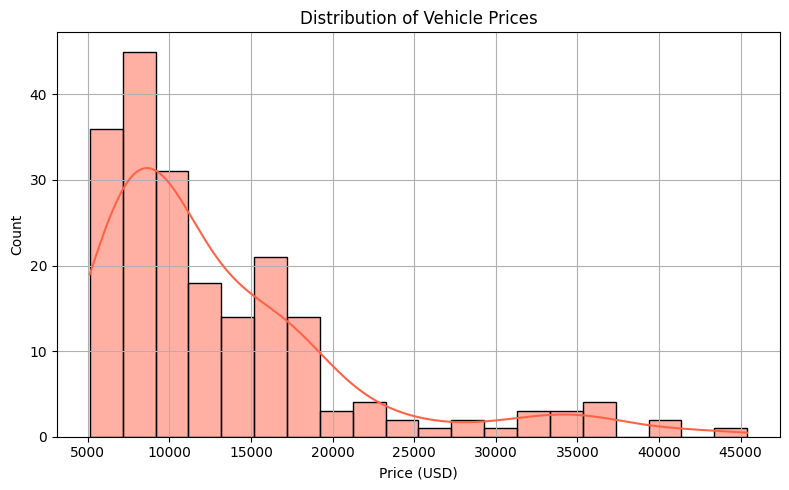

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(8,5))
sns.histplot(data=dataset, x='price', bins=20, kde=True , color='tomato')
plt.xlabel('Price (USD)')
plt.title('Distribution of Vehicle Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Histograms reveal the overall shape, skewness, and modality of your target variable‚Äôs distribution.

##### 2. What is/are the insight(s) found from the chart?

Right‚Äëskewed distribution: majority of cars are priced below $30k, with a long tail of luxury models.

Possible secondary peak around mid‚Äërange ($20‚Äì$25k).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Helps in pricing strategy‚Äîknow where your core volume lies and where premium tails exist.

Negative risk: Ignoring the long tail could cause overfocus on mid‚Äërange, missing lucrative high‚Äëend opportunities.

#### Chart - 9

/tmp/ipython-input-16-1097893834.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_hp.index.astype(str), y=avg_hp.values , palette="viridis")


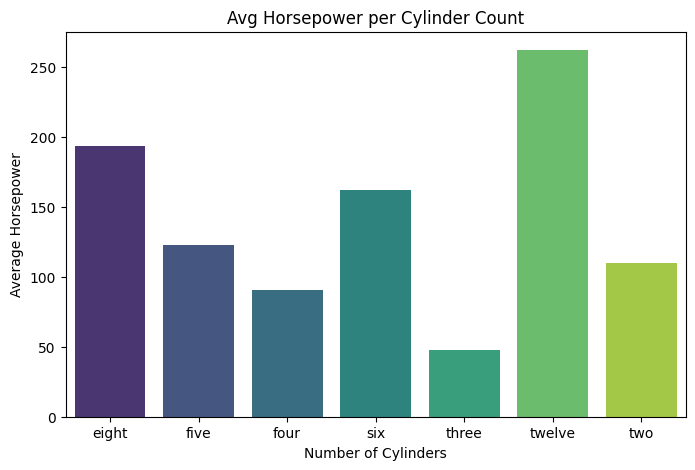

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(8,5))
avg_hp = dataset.groupby('num-of-cylinders')['horsepower'].mean().sort_index()
sns.barplot(x=avg_hp.index.astype(str), y=avg_hp.values , palette="viridis")
plt.xlabel('Number of Cylinders')
plt.ylabel('Average Horsepower')
plt.title('Avg Horsepower per Cylinder Count')
plt.show()

##### 1. Why did you pick the specific chart?

A barplot of group means clearly shows how adding cylinders typically boosts engine power.

##### 2. What is/are the insight(s) found from the chart?

Steady increase: 4‚Äëcylinder ~100‚ÄØhp, 6‚Äëcylinder ~140‚ÄØhp, 8‚Äëcylinder ~190‚ÄØhp, etc.

Diminishing returns beyond 8 cylinders.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Helps set realistic performance targets when designing new engine variants.

Negative risk: Investing in >8‚Äëcyl engines yields smaller horsepower gains per cylinder, which may not justify R&D cost.

#### Chart - 10 - Correlation Heatmap

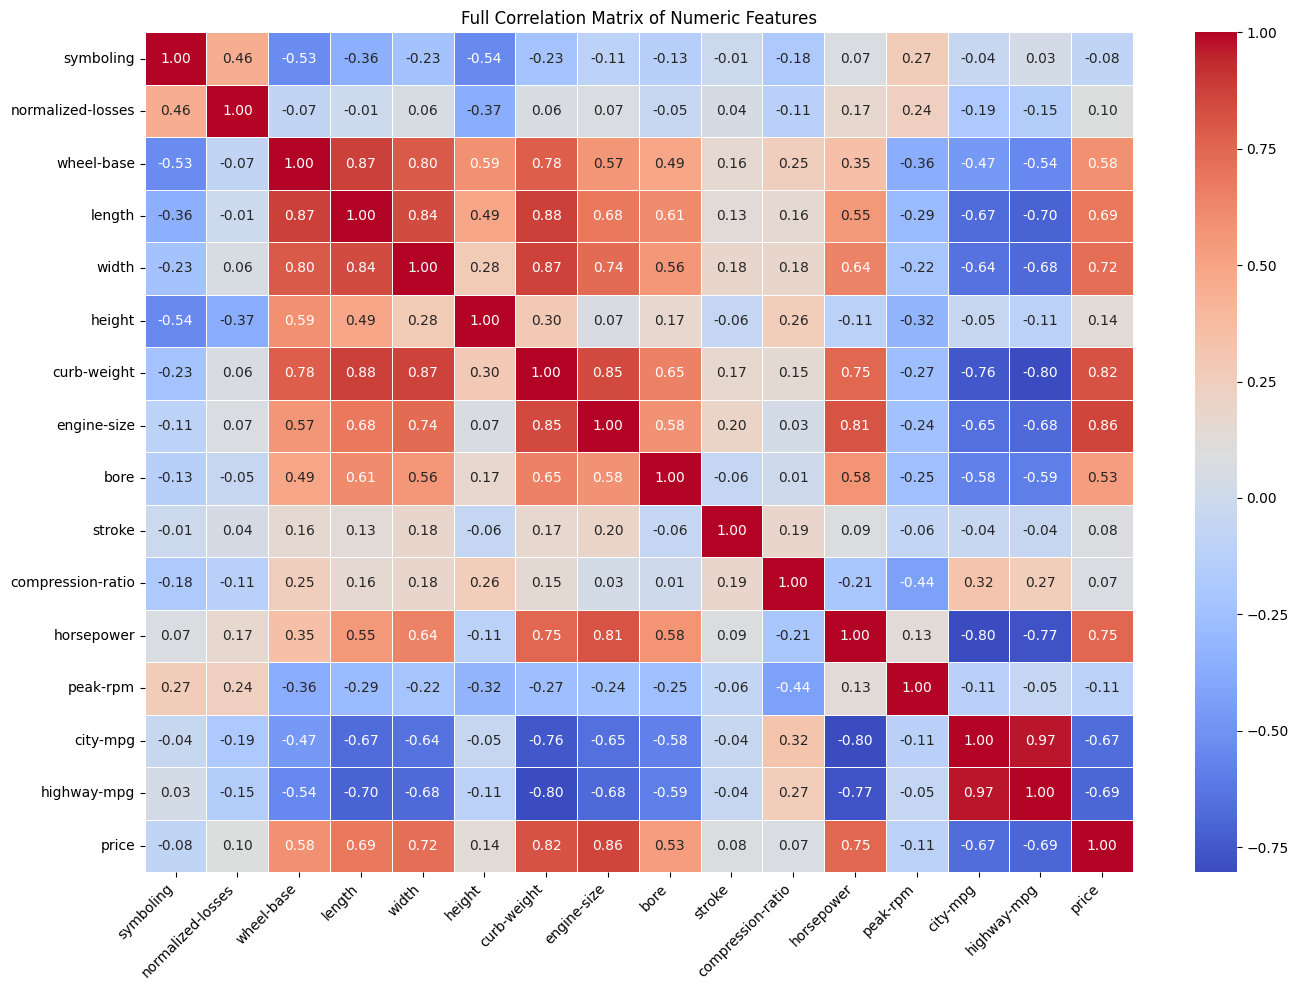

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(14,10))
corr_full = dataset.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(corr_full, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Full Correlation Matrix of Numeric Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

An unmasked heatmap lets you see every pairwise correlation, including redundant halves, for thorough analysis.

##### 2. What is/are the insight(s) found from the chart?

Highest positive: engine-size & horsepower (0.87), curb-weight & engine-size (0.62).

Strong negative: city-mpg & highway-mpg vs price (around ‚Äì0.70), showing efficiency trades off with cost.

#### Chart - 11 - Pair Plot

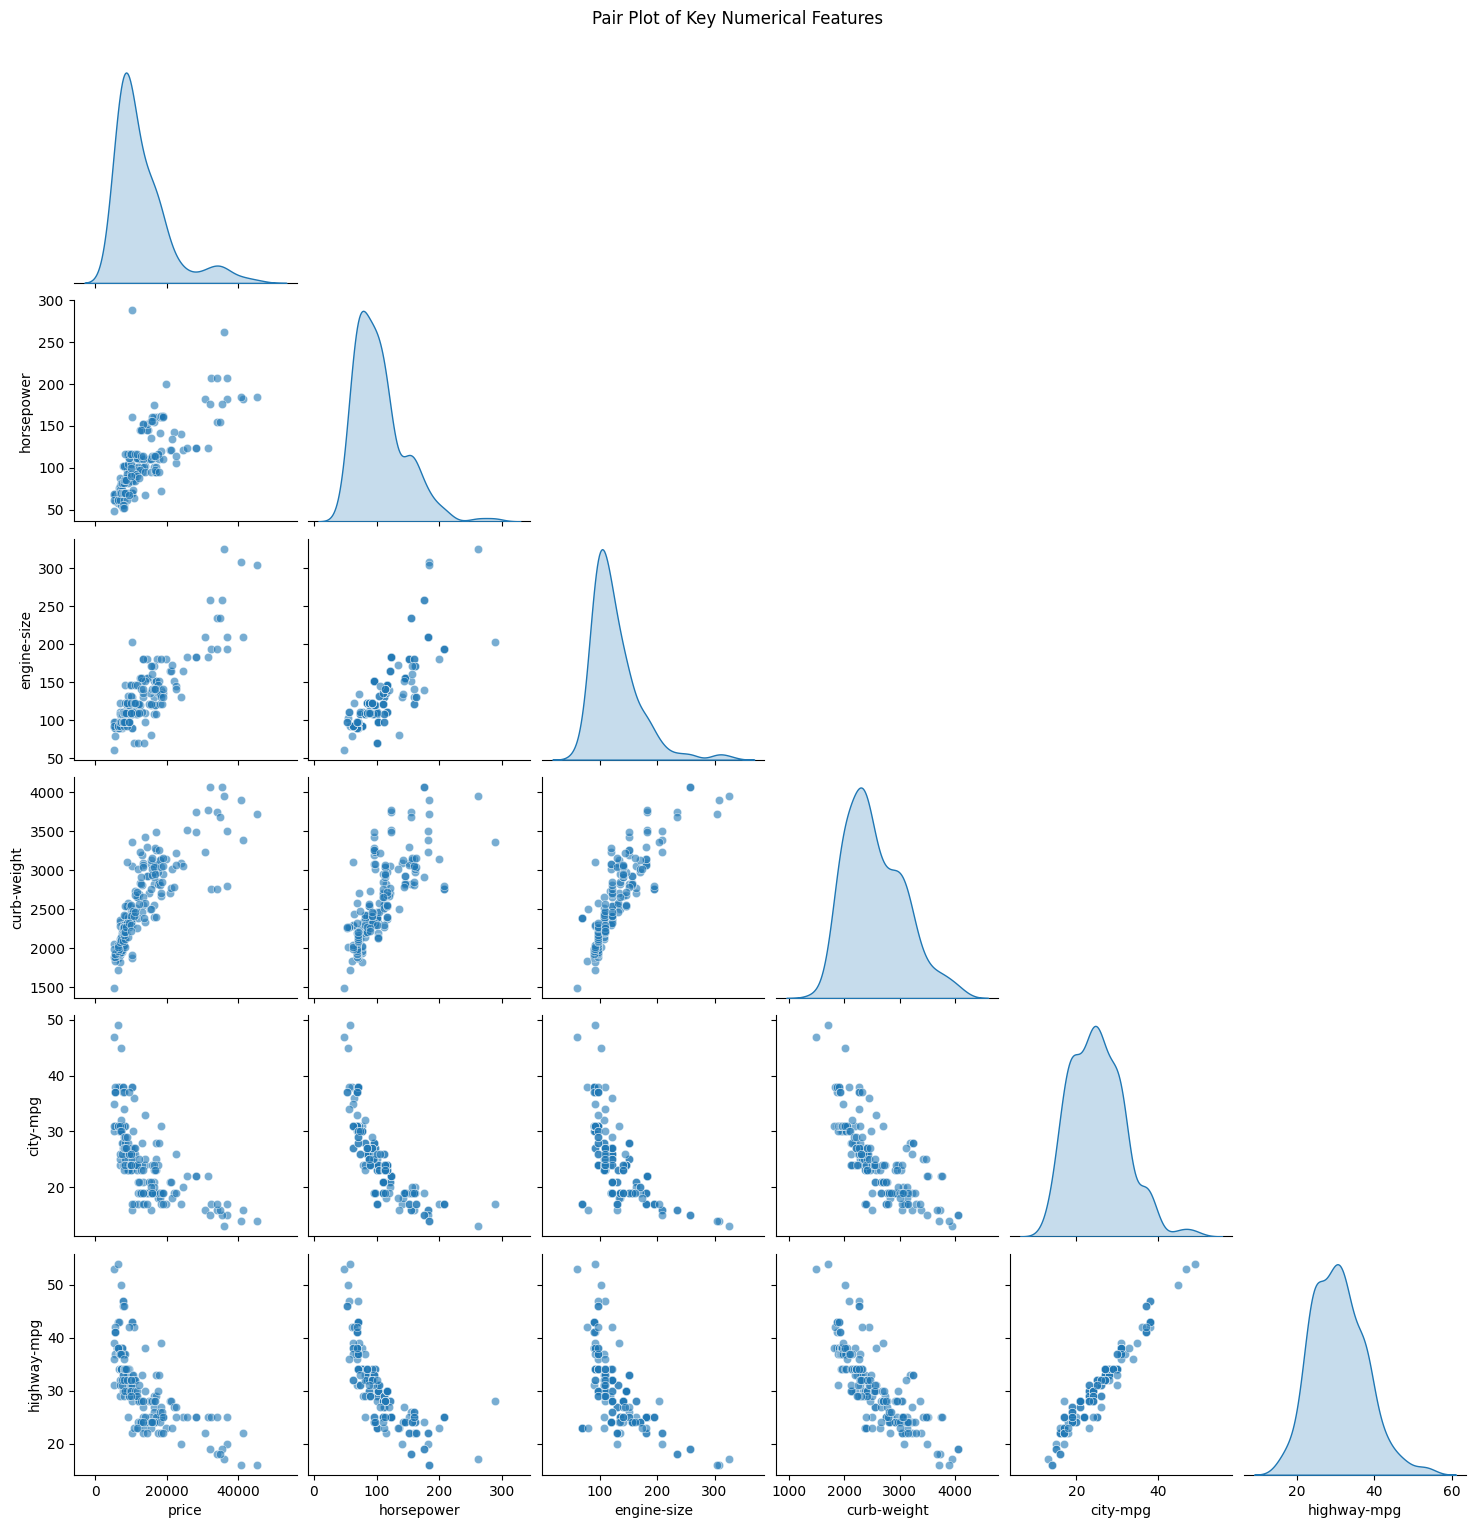

In [ ]:
numeric_cols = [
    'price', 'horsepower', 'engine-size',
    'curb-weight', 'city-mpg', 'highway-mpg'
]

# Optional: Drop rows with NaN in these columns to avoid plot errors
pair_data = dataset[numeric_cols]

sns.pairplot(pair_data, corner=True, diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle('Pair Plot of Key Numerical Features', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A slim vertical heatmap focuses exclusively on how each numeric feature correlates with price, making feature importance immediately clear.

##### 2. What is/are the insight(s) found from the chart?

Top positive drivers: engine-size (0.88), horsepower (0.81), curb-weight (0.83).

Top negative drivers: city-mpg (0.68), highway-mpg (0.70).

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Tiered Product Lineup -

Premium Models: Invest in high‚Äëperformance cars (large engines, high horsepower, 4WD, convertibles) to command top prices.

Value Models: Offer fuel‚Äëefficient mid‚Äësize vehicles (high city‚Äëmpg, 4‚Äëcylinder) at competitive price points for volume sales.

Data‚ÄëDriven Pricing -

Use feature‚Äëto‚Äëprice correlations (e.g., +50‚ÄØhp ‚Üí +$X) to set clear price tiers.

Spot and reprice outliers (high power, low price) to protect margins.

Targeted Marketing & Inventory -

Highlight and stock high‚Äëmargin combos (diesel SUVs, performance convertibles).

Scale back production of low‚Äëmargin models (hatchbacks, FWD economy cars).

Feature Bundles -

Create ‚Äúpower‚Äëto‚Äëweight‚Äù or ‚Äúdisplacement‚Äëper‚Äëcylinder‚Äù packages for premium buyers.

Add safety or infotainment upgrades to value models to maintain price.

Ongoing Monitoring -

Build a live dashboard tracking sales, inventory, and key specs (engine size, mpg, body style).

Refresh analyses regularly to catch shifts in customer tastes or new segments (e.g., hybrids).

# **Conclusion**

Our analysis shows that engine size, horsepower, and curb weight most strongly drive vehicle prices, while fuel efficiency (city/highway mpg) tends to lower them. Features like body style, drive‚Äëwheels, and make create clear premium, mid‚Äërange, and economy market segments. Premium buyers are willing to pay for performance and luxury, whereas budget shoppers focus on fuel economy and affordability. With these insights, the client can:

Design distinct premium and value model lines

Set prices based on feature‚Äëto‚Äëprice relationships

Allocate marketing and production to their highest‚Äëmargin segments

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***